In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import re
import scipy as sp
import scipy.stats as stats
from scipy.interpolate import interp1d

import stats13tools.stats13tools as st

%matplotlib inline

In [2]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

# Bike commute times

In [54]:
data = pd.read_csv("data-src/bike-commute-times.csv")
#data

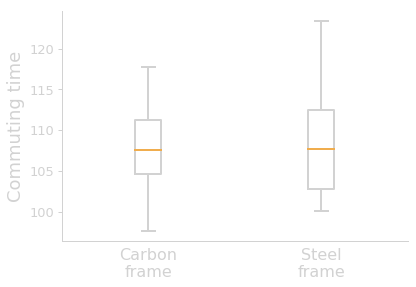

In [55]:
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.15, 0.15, 0.8, 0.8])
    
for ax in [ax1]:
    ax.boxplot([data[data.Frame=="steel"].Time, data[data.Frame=="carbon"].Time], labels=["Carbon\nframe", "Steel\nframe"],
              boxprops = dict(linewidth=2, color=colors["lightgray"]),
              flierprops = dict(marker='o', markeredgecolor=colors["lightgray"], linestyle='none'),
              whiskerprops = dict(color=colors["lightgray"], linewidth=2),
              capprops = dict(color=colors["lightgray"], linewidth=2),
              medianprops = dict(color=colors["orange"], linewidth=2))
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_ylabel("Commuting time", size=18, color=colors["lightgray"], ha="center")
    ax.tick_params(axis="y", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.tick_params(axis="x", width=1, size=0, labelcolor=colors["lightgray"], 
                   labelsize=16, pad=6)
    #ax.set_xlabel("Relative risk", size=18, color=colors["lightgray"], ha="center")
    #ax.set_ylim(0)
    #ax.set_xlim(0.85, 7)
    
plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-boxplot.svg", transparent=True)

In [61]:
print("Carbon frame:\n", "mean = {:.3f}, std = {:.3f}".format(data[data.Frame=="carbon"].Time.mean(), data[data.Frame=="carbon"].Time.std()))
print("Steel frame:\n", "mean = {:.3f}, std = {:.3f}".format(data[data.Frame=="steel"].Time.mean(), data[data.Frame=="steel"].Time.std()))

Carbon frame:
 mean = 108.344, std = 6.248
Steel frame:
 mean = 107.809, std = 4.892


# Simulation null hypothesis

In [58]:
n_simul = 10000
res_diff_mean = np.zeros(n_simul) #store the data
res_diff_median = np.zeros(n_simul) #store the data

n_bike_carbon = len(data[data.Frame=="carbon"])
n_bike_steel = len(data[data.Frame=="steel"])

all_times = data.Time.values.copy()

#each simulation is the shuffling of the full population and the
#calculation of the difference in proportion of shifts with death
for i in range(n_simul):
    np.random.shuffle(all_times)
    carbon_times = all_times[:n_bike_carbon]
    steel_times = all_times[n_bike_carbon:]
    res_diff_mean[i] = np.mean(carbon_times)-np.mean(steel_times)
    res_diff_median[i] = np.median(carbon_times)-np.median(steel_times)

### Simulation steps

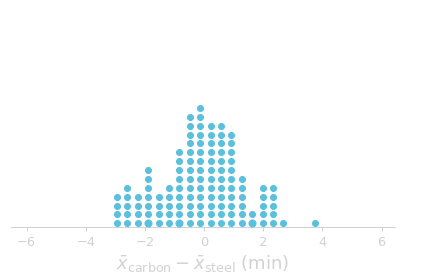

In [59]:
x1, y1 = st.to_dotplot(res_diff_mean[:120], kind="bins", scale=0.05, nbins=20)

#randomize order of each rows of data points
rows_yval = np.unique(y1)
idx_by_rows = [list(np.where(y1 == val)[0]) for val in rows_yval]
for i in range(len(idx_by_rows)):
    np.random.shuffle(idx_by_rows[i])
shuffled_idx = np.concatenate(idx_by_rows)

x1 = x1[shuffled_idx]
y1 = y1[shuffled_idx]

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
ax8 = ax1.twinx()

for ax in [ax1]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_ylim(-0.02, 1.2)
    ax.set_xlim(res_diff_mean.min()-1, res_diff_mean.max()+1)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax2]:
    ax.scatter(x1[0], y1[0], s=50, color=colors["blue"])

for ax in [ax3]:
    ax.scatter(x1[1], y1[1], s=50, color=colors["blue"])

for ax in [ax4]:
    ax.scatter(x1[2], y1[2], s=50, color=colors["blue"])

for ax in [ax5]:
    ax.scatter(x1[3:25], y1[3:25], color=colors["blue"])

for ax in [ax6]:
    ax.scatter(x1[25:50], y1[25:50], color=colors["blue"])

for ax in [ax7]:
    ax.scatter(x1[50:80], y1[50:80], color=colors["blue"])

for ax in [ax8]:
    ax.scatter(x1[80:], y1[80:], color=colors["blue"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-mean.svg", transparent=True)

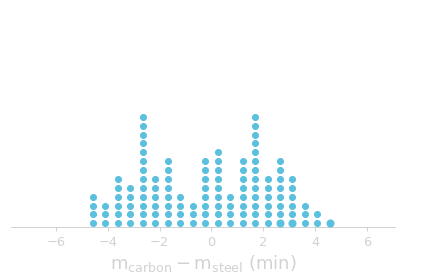

In [60]:
x1, y1 = st.to_dotplot(res_diff_median[:120], kind="bins", scale=0.05, nbins=20)

#randomize order of each rows of data points
rows_yval = np.unique(y1)
idx_by_rows = [list(np.where(y1 == val)[0]) for val in rows_yval]
for i in range(len(idx_by_rows)):
    np.random.shuffle(idx_by_rows[i])
shuffled_idx = np.concatenate(idx_by_rows)

x1 = x1[shuffled_idx]
y1 = y1[shuffled_idx]

fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
ax6 = ax1.twinx()
ax7 = ax1.twinx()
ax8 = ax1.twinx()

for ax in [ax1]:
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('$\mathrm{m}_{\mathrm{carbon}}-\mathrm{m}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_ylim(-0.02, 1.2)
    ax.set_xlim(res_diff_median.min()-1, res_diff_median.max()+1)
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,5))

for ax in [ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.set_ylim(ax1.get_ylim())
    ax.axis("off")
    
for ax in [ax2]:
    ax.scatter(x1[0], y1[0], s=50, color=colors["blue"])

for ax in [ax3]:
    ax.scatter(x1[1], y1[1], s=50, color=colors["blue"])

for ax in [ax4]:
    ax.scatter(x1[2], y1[2], s=50, color=colors["blue"])

for ax in [ax5]:
    ax.scatter(x1[3:25], y1[3:25], color=colors["blue"])

for ax in [ax6]:
    ax.scatter(x1[25:50], y1[25:50], color=colors["blue"])

for ax in [ax7]:
    ax.scatter(x1[50:80], y1[50:80], color=colors["blue"])

for ax in [ax8]:
    ax.scatter(x1[80:], y1[80:], color=colors["blue"])

plt.tight_layout()

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-median.svg", transparent=True)

### Full simulation (10000)

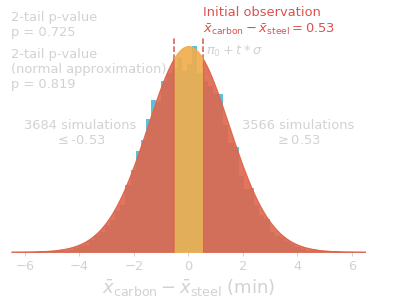

In [136]:
#Observed diff
bike_diff_mean = data[data.Frame=="carbon"].Time.mean()-data[data.Frame=="steel"].Time.mean()
bike_diff_mean_se = np.sqrt((data[data.Frame=="carbon"].Time.std()**2/n_bike_carbon)+(data[data.Frame=="steel"].Time.std()**2/n_bike_steel))

#t distribution
tdist_bike_diff = stats.t(df=len(data)-1, loc=0, scale=bike_diff_mean_se)
xt_bike_diff = np.linspace(-6.5, 6.5, 1000)
yt_bike_diff = tdist_bike_diff.pdf(xt_bike_diff)

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax4 = ax1.twinx()
ax5 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_mean, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel(r'$\bar{x}_{\mathrm{carbon}}-\bar{x}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_xlim(xt_bike_diff.min(), xt_bike_diff.max())
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(bike_diff_mean, color=colors["red"], ls="--")
    ax.text(bike_diff_mean, ax.get_ylim()[1]*1.01, "Initial observation\n" r"$\bar{{x}}_{{\mathrm{{carbon}}}}-\bar{{x}}_{{\mathrm{{steel}}}}={:.2f}$".format(bike_diff_mean), color=colors["red"], size=13, ha="left")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(0-bike_diff_mean, color=colors["red"], ls="--")
    ax.text(bike_diff_mean+3.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\geq${:.2f}".format(np.sum(res_diff_mean>=bike_diff_mean), bike_diff_mean), color=colors["lightgray"], size=13, ha="center")
    ax.text(bike_diff_mean-4.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\leq${:.2f}".format(np.sum(res_diff_mean<=0-bike_diff_mean), 0-bike_diff_mean), color=colors["lightgray"], size=13, ha="center")
    n_extreme = np.sum(res_diff_mean<=0-bike_diff_mean)+np.sum(res_diff_mean>=bike_diff_mean)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1, "2-tail p-value\np = {:.3f}".format(n_extreme/10000), color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")

for ax in [ax4]:
    lower_lim = 0-bike_diff_mean
    upper_lim = bike_diff_mean
    ax.fill_between(xt_bike_diff, yt_bike_diff,
                       color=colors["orange"], alpha=0.7)
    ax.set_ylim(0)
    ax.axis("off")

for ax in [ax5]:
    lower_lim = 0-bike_diff_mean
    upper_lim = bike_diff_mean
    ax.fill_between(xt_bike_diff[(xt_bike_diff>lower_lim) & (xt_bike_diff<upper_lim)], yt_bike_diff[(xt_bike_diff>lower_lim) & (xt_bike_diff<upper_lim)],
                       color=colors["orange"], alpha=0.7)
    ax.fill_between(xt_bike_diff[(xt_bike_diff<=lower_lim)], yt_bike_diff[(xt_bike_diff<=lower_lim)],
                       color=colors["red"], alpha=0.7)
    ax.fill_between(xt_bike_diff[(xt_bike_diff>=upper_lim)], yt_bike_diff[(xt_bike_diff>=upper_lim)],
                       color=colors["red"], alpha=0.7)
    ax.set_ylim(0)
    norm_pvalue_2tail = tdist_bike_diff.sf(0.53/bike_diff_mean_se)*2
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*0.76, "2-tail p-value\n(normal approximation)\np = {:.3f}".format(norm_pvalue_2tail), color=colors["lightgray"], size=13, ha="left")
    ax.text(0.65, ax.get_ylim()[1]*0.91, "$\pi_0+t*\sigma$", color=colors["lightgray"], size=13, ha="left")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-mean-all.svg", transparent=True)

In [138]:
t_stat = (108.34-107.81)/np.sqrt(6.25**2/26+4.89**2/30)
t_stat

0.34951163077089586

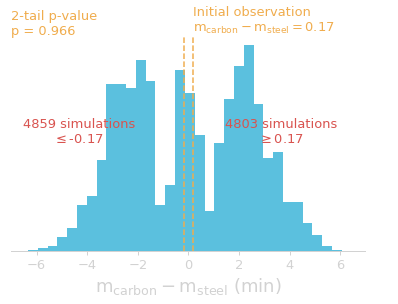

In [125]:
#Observed diff
bike_diff_median = data[data.Frame=="carbon"].Time.median()-data[data.Frame=="steel"].Time.median()

fig = plt.figure(figsize=(6,4))
ax1 = fig.add_axes([0.1, 0.15, 0.82, 0.75])
ax2 = ax1.twinx()
ax3 = ax1.twinx()
    
for ax in [ax1]:
    ax.hist(res_diff_median, bins="auto", color=colors["blue"])
    for spine in ["bottom"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    ax.set_yticks([])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_xlabel('$\mathrm{m}_{\mathrm{carbon}}-\mathrm{m}_{\mathrm{steel}}$ (min)', size=18, color=colors["lightgray"])
    ax.set_xlim(-7, 7)
    ax.set_ylim(0)
    
for ax in [ax2]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(bike_diff_median, color=colors["orange"], ls="--")
    ax.text(bike_diff_median, ax.get_ylim()[1]*1.01, "Initial observation\n" "$\mathrm{{m}}_{{\mathrm{{carbon}}}}-\mathrm{{m}}_{{\mathrm{{steel}}}}={:.2f}$".format(bike_diff_median), color=colors["orange"], size=13, ha="left")
    ax.axis("off")
    
for ax in [ax3]:
    ax.set_ylim(ax1.get_ylim())
    ax.axvline(0-bike_diff_median, color=colors["orange"], ls="--")
    ax.text(bike_diff_median+3.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\geq${:.2f}".format(np.sum(res_diff_median>=bike_diff_median), bike_diff_median), color=colors["red"], size=13, ha="center")
    ax.text(bike_diff_median-4.5, ax.get_ylim()[1]*0.5, "{:.0f} simulations\n$\leq${:.2f}".format(np.sum(res_diff_median<=0-bike_diff_median), 0-bike_diff_median), color=colors["red"], size=13, ha="center")
    n_extreme = np.sum(res_diff_median<=0-bike_diff_median)+np.sum(res_diff_median>=bike_diff_median)
    ax.text(ax.get_xlim()[0], ax.get_ylim()[1]*1, "2-tail p-value\np = {:.3f}".format(n_extreme/10000), color=colors["orange"], size=13, ha="left")
    ax.axis("off")


plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/bike-commute-simulation-diff-median-all.svg", transparent=True)

## Simulation 95% confidence intervals

In [142]:
n_simul = 10000
res_median = np.zeros(n_simul) #store the data

n_bike_carbon = len(data[data.Frame=="carbon"])
n_bike_steel = len(data[data.Frame=="steel"])

#each simulation is the difference in median time from isolated bootstrap samples
for i in range(n_simul):
    bootstrap_carbon = np.random.choice(data[data.Frame=="carbon"].Time, size=n_bike_carbon)
    bootstrap_steel = np.random.choice(data[data.Frame=="steel"].Time, size=n_bike_steel)
    res_median[i] = np.median(bootstrap_carbon)-np.median(bootstrap_steel)

(array([   48.,   298.,   775.,  1570.,  2488.,  2006.,  1730.,   803.,
          241.,    41.]),
 array([-7.7166665 , -6.17583325, -4.635     , -3.09416675, -1.5533335 ,
        -0.01250025,  1.528333  ,  3.06916625,  4.6099995 ,  6.15083275,
         7.691666  ]),
 <a list of 10 Patch objects>)

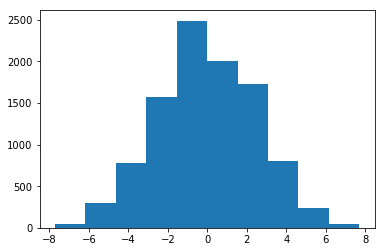

In [143]:
plt.hist(res_median)